__autor__ = Melany Calderón-Osorno

__versión__ = 0.2

__fecha__ = 2025-07-10

#**Mobsuite Postprocessing Plots**

This tutorial uses the tables generated during the Mobsuite and pysam post-processing steps to guide you in creating publication-ready figures.

#**Setup notebook environment**

The following code installs the required libraries.

In [1]:
install.packages('patchwork')
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("DESeq2")
install.packages('pheatmap')
install.packages('reshape2')
install.packages('vegan')
install.packages('forcats')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘formatR’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘MatrixGenerics’, ‘RcppArmadillo’


Old packages: 'data.table', 'purrr', 'waldo'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Install

The following code imports the required libraries.

In [2]:
library(readxl)
library(dplyr)
library(ggplot2)
library(patchwork)
library(DESeq2)
library(tidyr)
library(pheatmap)
library(reshape2)
library(vegan)
library(forcats)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: generics


Attaching package: ‘generics’


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:dplyr’:

    combine


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, gre

**Input/Output paths**


**Inputs**

The code downloads an Excel metadata file from a URL to a temporary location, reads it into a data frame called metadata using read_excel(), and displays its first rows.

In [3]:
mtd = 'https://raw.githubusercontent.com/mecalderon/Tutorial_Summer_Retreat/master/data/data-deepsea.xlsx'
mtdf <- tempfile(fileext = ".xlsx")
download.file(mtd, destfile = mtdf, mode = "wb")
metadata <- read_excel(mtdf)
head(metadata)

ENA_Run_Accession_ID,Sample,Ocean,Depth,depth.group,Longitude,Latitude
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
TARA_B100001179,ERR598944,Atlantic,-800,270-1000,-16.8714,43.7182
TRAA_B100000470,ERR598947,Atlantic,-700,270-1000,4.6685,-31.0198
TARA_B100001750,ERR598958,Indian,-250,270-1000,-56.9684,34.1504
TARA_B000000460,ERR598960,Indian,-850,270-1000,26.2905,-35.1889
TARA_B100001765,ERR598964,Atlantic,-740,270-1000,-49.8233,34.0771
TARA_B100000929,ERR598971,Pacific,-380,270-1000,-84.5546,2.0649


The code reads a tab-separated file from a URL into R, loads it as a matrix using the Gene column as row names, and stores it in the variable mobsuite_count.

In [4]:
mobsuite_count <- as.matrix(read.csv("https://raw.githubusercontent.com/mecalderon/Tutorial_Summer_Retreat/master/results/Mobsuite_processing/final_mobsuite.tsv", sep="\t", row.names="Gene"))
mobsuite_count

,ERR598944,ERR598947,ERR598958,ERR598960,ERR598964,ERR598971,ERR598980,ERR598985,ERR598999,ERR599000,⋯,SRR3965758,SRR3965873,SRR3965874,SRR3966130,SRR3967319,SRR3967690,SRR3967700,SRR3968061,SRR3968062,SRR3968777
-,772716,55284,350813,776317.0,623094,470454,68403,741881,137161,759153.0,⋯,20351,19580,4761,27766,9829,8205,3026,1044,78214,5031
MOBB,0,0,0,0.0,0,0,0,0,0,0.0,⋯,0,0,0,0,0,0,0,0,0,0
MOBF,3628,0,6440,1432.0,9523,52684,0,0,0,6125.5,⋯,0,0,0,0,0,0,0,0,0,0
MOBH,0,0,0,0.0,0,0,3229,0,0,0.0,⋯,0,0,0,1366,0,0,1116,0,0,0
MOBP,674,547,158,592.5,989,0,0,3322,0,2649.5,⋯,0,142,0,563,0,0,0,0,0,0
MOBQ,4630,179,0,5062.0,281,0,0,3881,0,0.0,⋯,88,0,0,0,0,0,517,0,0,0
MOBV,0,0,0,0.0,0,0,0,0,0,0.0,⋯,0,0,0,0,0,0,356,0,0,0


The code downloads an Excel file from a URL to a temporary file, reads it into a data frame called all_mob using read_excel(), and displays its first rows.

In [5]:
mc = 'https://raw.githubusercontent.com/mecalderon/Tutorial_Summer_Retreat/master/results/Mobsuite_processing/mobsuite_combined_results.xlsx'
mcf <- tempfile(fileext = ".xlsx")
download.file(mc, destfile = mcf, mode = "wb")
all_mob <- read_excel(mcf)
head(all_mob )

Sample,sample_id,num_contigs,size,gc,md5,rep_type(s),rep_type_accession(s),relaxase_type(s),relaxase_type_accession(s),⋯,primary_cluster_id,secondary_cluster_id,predicted_host_range_overall_rank,predicted_host_range_overall_name,class,observed_host_range_ncbi_rank,observed_host_range_ncbi_name,reported_host_range_lit_rank,reported_host_range_lit_name,associated_pmid(s)
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ERR599072,filtered_contigs.plasmid:AA287,9,60477,0.5816922,13cbbe35457b8f4f3001d27fe61a3342,rep_cluster_613,002061__CP022420_00034,-,-,⋯,AA287,-,order,Rhodobacterales,Alphaproteobacteria,order,Rhodobacterales,-,-,-
ERR599072,filtered_contigs.plasmid:AE468,13,100337,0.5979848,2fcbebfb001c3881d80c9daba4402d69,"rep_cluster_392,rep_cluster_517","001717__CP019309,001892__CP022421_00013",MOBP,CP028477_00051,⋯,AE468,AO253,family,Roseobacteraceae,Alphaproteobacteria,family,Roseobacteraceae,-,-,-
ERR599072,filtered_contigs.plasmid:AD061,14,72900,0.6065432,08ee269ebc3df6fdc8c120e2d8b47b63,-,-,MOBF,CP015441_00197,⋯,AD061,-,genus,Aurantiacibacter,Alphaproteobacteria,genus,Aurantiacibacter,-,-,-
ERR599072,filtered_contigs.plasmid:novel_e4d4b3952274cc13d25fa63ad1ccd591,1,13043,0.4199187,e4d4b3952274cc13d25fa63ad1ccd591,rep_cluster_952,002435__CP022516,MOBB,CP022516_00068,⋯,novel_e4d4b3952274cc13d25fa63ad1ccd591,-,genus,Arenibacter,Flavobacteriia,genus,Arenibacter,-,-,-
ERR599072,filtered_contigs.plasmid:AD350,5,21939,0.6505766,d7b474fdbb79e9bb5d48804c27c37b18,-,-,-,-,⋯,AD350,-,genus,Sphingobium,Alphaproteobacteria,genus,Sphingobium,-,-,-
ERR599072,filtered_contigs.plasmid:novel_c8c7a50f0067115e2eeb8765d710ef9f,23,52078,0.6040747,c8c7a50f0067115e2eeb8765d710ef9f,-,-,MOBP,NC_023148_00033,⋯,novel_c8c7a50f0067115e2eeb8765d710ef9f,-,order,Rhodobacterales,Alphaproteobacteria,order,Rhodobacterales,-,-,-


The code rounds down values in mobsuite_count to the nearest integer, removes rows that contain only zeros across all columns, sorts the columns alphabetically, and displays the cleaned matrix.

In [6]:
mobsuite_count <- floor(mobsuite_count)
rows_with_zeros <- rowSums(mobsuite_count == 0) == ncol(mobsuite_count)
mobsuite_count <- mobsuite_count[!rows_with_zeros, ]
mobsuite_count <- mobsuite_count[, order(colnames(mobsuite_count))]
mobsuite_count

,ERR598944,ERR598947,ERR598958,ERR598960,ERR598964,ERR598971,ERR598980,ERR598985,ERR598999,ERR599000,⋯,SRR3965758,SRR3965873,SRR3965874,SRR3966130,SRR3967319,SRR3967690,SRR3967700,SRR3968061,SRR3968062,SRR3968777
-,772716,55284,350813,776317,623094,470454,68403,741881,137161,759153,⋯,20351,19580,4761,27766,9829,8205,3026,1044,78214,5031
MOBB,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MOBF,3628,0,6440,1432,9523,52684,0,0,0,6125,⋯,0,0,0,0,0,0,0,0,0,0
MOBH,0,0,0,0,0,0,3229,0,0,0,⋯,0,0,0,1366,0,0,1116,0,0,0
MOBP,674,547,158,592,989,0,0,3322,0,2649,⋯,0,142,0,563,0,0,0,0,0,0
MOBQ,4630,179,0,5062,281,0,0,3881,0,0,⋯,88,0,0,0,0,0,517,0,0,0
MOBV,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,356,0,0,0


The code creates a DESeq2 dataset object dds_mob for differential analysis using the mobsuite_count matrix as count data, with sample metadata and a design formula based on depth.group.

In [7]:
dds_mob <- DESeqDataSetFromMatrix(countData = mobsuite_count,
                              colData = metadata,
                              design = ~ depth.group)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



The code runs the DESeq2 differential expression analysis on the dds_mob dataset using the mean fit type for dispersion estimation.

In [8]:
dds_mob <- DESeq(dds_mob, fitType='mean')

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

fitting model and testing

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  fo

The code extracts the normalized counts from the DESeq2 object dds_mob, transposes the matrix so samples are rows, converts it to a data frame df_t_gene, converts the metadata to a data frame df_metadata, and displays the first few rows of both.

In [9]:
normalized_gene = counts(dds_mob, normalized = TRUE)
t_gene = t(normalized_gene)
df_t_gene <- as.data.frame(t_gene)
df_metadata <- as.data.frame(metadata)
head(df_t_gene)
head(df_metadata)

,-,MOBB,MOBF,MOBH,MOBP,MOBQ,MOBV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ERR598944,41044.21,0,192.70779,0,35.80073,245.93083,0
ERR598947,41044.21,0,0.00000,0,406.10633,132.89403,0
ERR598958,41044.21,0,753.46326,0,18.48559,0.00000,0
ERR598960,41044.21,0,75.71045,0,31.29929,267.63009,0
ERR598964,41044.21,0,627.29540,0,65.14703,18.50992,0
ERR598971,41044.21,0,4596.35397,0,0.00000,0.00000,0


,ENA_Run_Accession_ID,Sample,Ocean,Depth,depth.group,Longitude,Latitude
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,TARA_B100001179,ERR598944,Atlantic,-800,270-1000,-16.8714,43.7182
2,TRAA_B100000470,ERR598947,Atlantic,-700,270-1000,4.6685,-31.0198
3,TARA_B100001750,ERR598958,Indian,-250,270-1000,-56.9684,34.1504
4,TARA_B000000460,ERR598960,Indian,-850,270-1000,26.2905,-35.1889
5,TARA_B100001765,ERR598964,Atlantic,-740,270-1000,-49.8233,34.0771
6,TARA_B100000929,ERR598971,Pacific,-380,270-1000,-84.5546,2.0649


The code adds a Sample column to df_t_gene using its row names as sample identifiers, then displays the first few rows of both df_t_gene and df_metadata.

In [10]:
df_t_gene$Sample <- rownames(df_t_gene)

head(df_t_gene)
head(df_metadata)

,-,MOBB,MOBF,MOBH,MOBP,MOBQ,MOBV,Sample
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ERR598944,41044.21,0,192.70779,0,35.80073,245.93083,0,ERR598944
ERR598947,41044.21,0,0.00000,0,406.10633,132.89403,0,ERR598947
ERR598958,41044.21,0,753.46326,0,18.48559,0.00000,0,ERR598958
ERR598960,41044.21,0,75.71045,0,31.29929,267.63009,0,ERR598960
ERR598964,41044.21,0,627.29540,0,65.14703,18.50992,0,ERR598964
ERR598971,41044.21,0,4596.35397,0,0.00000,0.00000,0,ERR598971


,ENA_Run_Accession_ID,Sample,Ocean,Depth,depth.group,Longitude,Latitude
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,TARA_B100001179,ERR598944,Atlantic,-800,270-1000,-16.8714,43.7182
2,TRAA_B100000470,ERR598947,Atlantic,-700,270-1000,4.6685,-31.0198
3,TARA_B100001750,ERR598958,Indian,-250,270-1000,-56.9684,34.1504
4,TARA_B000000460,ERR598960,Indian,-850,270-1000,26.2905,-35.1889
5,TARA_B100001765,ERR598964,Atlantic,-740,270-1000,-49.8233,34.0771
6,TARA_B100000929,ERR598971,Pacific,-380,270-1000,-84.5546,2.0649


The code merges df_t_gene with df_metadata on the Sample column, adding metadata to the gene count data, then displays the first rows and column names of the resulting data frame.

In [11]:
df_t_gene<- df_t_gene %>% left_join(df_metadata, by = 'Sample')
head(df_t_gene)
colnames(df_t_gene)

,-,MOBB,MOBF,MOBH,MOBP,MOBQ,MOBV,Sample,ENA_Run_Accession_ID,Ocean,Depth,depth.group,Longitude,Latitude
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,41044.21,0,192.70779,0,35.80073,245.93083,0,ERR598944,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
2,41044.21,0,0.00000,0,406.10633,132.89403,0,ERR598947,TRAA_B100000470,Atlantic,-700,270-1000,4.6685,-31.0198
3,41044.21,0,753.46326,0,18.48559,0.00000,0,ERR598958,TARA_B100001750,Indian,-250,270-1000,-56.9684,34.1504
4,41044.21,0,75.71045,0,31.29929,267.63009,0,ERR598960,TARA_B000000460,Indian,-850,270-1000,26.2905,-35.1889
5,41044.21,0,627.29540,0,65.14703,18.50992,0,ERR598964,TARA_B100001765,Atlantic,-740,270-1000,-49.8233,34.0771
6,41044.21,0,4596.35397,0,0.00000,0.00000,0,ERR598971,TARA_B100000929,Pacific,-380,270-1000,-84.5546,2.0649


[1] "-"                    "MOBB"                 "MOBF"                
 [4] "MOBH"                 "MOBP"                 "MOBQ"                
 [7] "MOBV"                 "Sample"               "ENA_Run_Accession_ID"
[10] "Ocean"                "Depth"                "depth.group"         
[13] "Longitude"            "Latitude"

The code groups df_t_gene by depth.group, sums the counts for selected MOB genes within each group, reshapes the data from wide to long format with gene names and their summed values, and stores the result in df_summarized.

In [12]:
df_summarized <- df_t_gene %>%
  group_by(`depth.group`) %>%
  summarise(`MOBB` = sum(`MOBB`),
            `MOBF` = sum(`MOBF`),
            `MOBH` = sum(`MOBH`),
            `MOBP` = sum(`MOBP`),
            `MOBQ` = sum(`MOBQ`),
            `MOBV` = sum(`MOBV`)) %>% pivot_longer(cols = `MOBB`: `MOBV`,
                                                       names_to = "gene",
                                                       values_to = "valor")
df_summarized

depth.group,gene,valor
<chr>,<chr>,<dbl>
2400-4005,MOBB,0.0000
2400-4005,MOBF,0.0000
2400-4005,MOBH,17156.5024
2400-4005,MOBP,26394.4937
2400-4005,MOBQ,18547.1215
2400-4005,MOBV,4828.7305
270-1000,MOBB,74.7474
270-1000,MOBF,29304.6642
270-1000,MOBH,10925.4272


The code creates a boxplot with jittered points to visualize the total abundance of MOB genes across two depth groups.

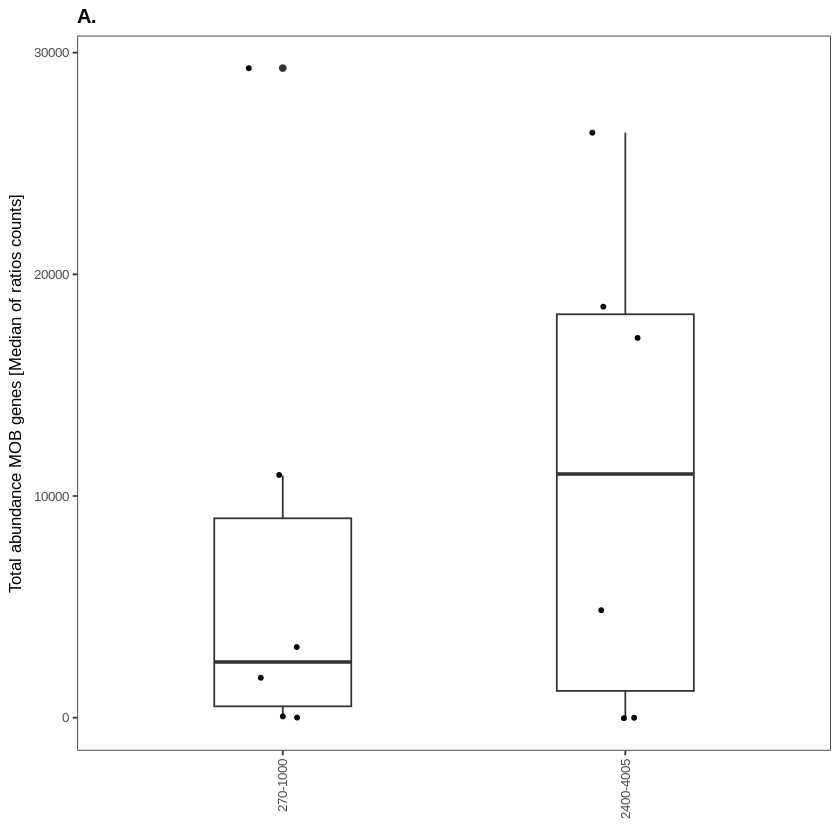

In [13]:
total_MOB <- df_summarized %>%
  ggplot(aes(x = factor(depth.group, levels = c("270-1000", "2400-4005")), y = valor)) +
  geom_boxplot(width = 0.4) +
  geom_jitter(width = 0.1, size = 1) +
  theme_bw() +
  ggtitle("A.") +
  ylab("Total abundance MOB genes [Median of ratios counts]") +
  xlab("") +
  theme(
    axis.text.x = element_text(size = 8, angle = 90, vjust = 0.5, hjust = 1),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 10),
    axis.title.x = element_blank(),
    legend.text = element_text(size = 10),
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(size = 12, face = "bold")
  )
total_MOB

The code transforms MOB gene counts to relative percentages per sample, reshapes and summarizes the data by gene and sample, then merges it with metadata for further analysis, storing the final result in data1.

In [14]:
sample_name <- df_t_gene$Sample
df_t_gene <- subset(df_t_gene, select = -1)
df_t_gene = t(df_t_gene[1:6])
colnames(df_t_gene) <- sample_name
gene_name <- c("MOBB", "MOBF", "MOBH", "MOBP", "MOBQ", "MOBV")
df_t_gene <- as.data.frame(df_t_gene)
df_t_gene <- sapply(df_t_gene[1:81], prop.table) * 100
df_t_gene <- as.data.frame(df_t_gene)
df_t_gene$gene <- gene_name

data1 <- df_t_gene %>%
  pivot_longer(cols =   ERR598944:SRR3968777,
               names_to = "Sample",
               values_to = "valor")%>%
  group_by(Sample, gene)%>%
  summarise(sum_gene = sum(valor))%>%
  pivot_wider(names_from = "gene",
              values_from = "sum_gene")
data1 <- data1 %>%
  pivot_longer(cols = `MOBB`:`MOBV`,
               names_to = "gene",
               values_to = "valor")

data1<-
  data1 %>%
  left_join(df_metadata)
head(data1)

`summarise()` has grouped output by 'Sample'. You can override using the
`.groups` argument.
Joining with `by = join_by(Sample)`


Sample,gene,valor,ENA_Run_Accession_ID,Ocean,Depth,depth.group,Longitude,Latitude
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
ERR598944,MOBB,0.000000,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
ERR598944,MOBF,40.618003,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
ERR598944,MOBH,0.000000,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
ERR598944,MOBP,7.545902,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
ERR598944,MOBQ,51.836095,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
ERR598944,MOBV,0.000000,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182


The code filters out missing values from data1, then creates a stacked bar plot (abundance_MOB) showing the relative abundance of MOB genes per sample, faceted by ocean.

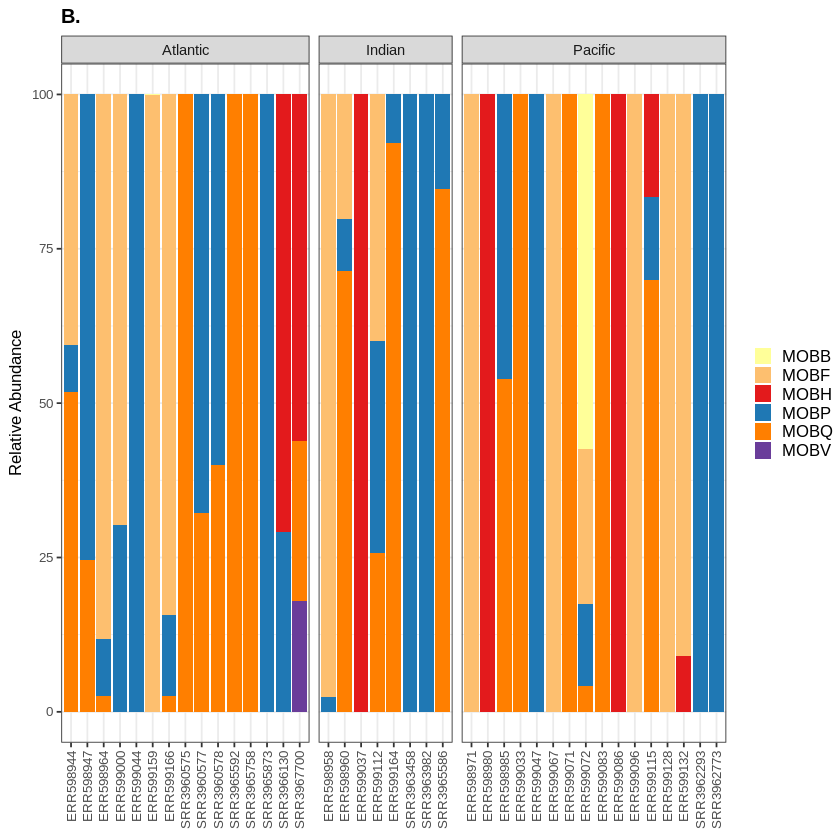

In [15]:
data1 <- data1 %>% drop_na(valor)

abundance_MOB <- ggplot(data=data1, aes(x=Sample, y=valor,fill=gene))+
  geom_bar(stat = "identity") +
  facet_grid(~ Ocean, scales = "free_x",  space = "free_x") +
  scale_fill_manual(values =  c("#FFFF99", "#FDBF6F", "#E31A1C", "#1F78B4","#FF7F00", "#6A3D9A"))+
  theme_bw()+ggtitle("B.")+ylab("Relative Abundance") + xlab("")+
  theme(plot.title = element_text(hjust = 0,size = 12, face="bold"),
        axis.text.x = element_text(size=8,angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size = 8),
        axis.title.y = element_text(size = 10),
        axis.title.x = element_blank(),
        legend.text = element_text(size = 10),
        legend.position = "right",
        legend.key.size = unit(0.4, "cm"),
        legend.title = element_blank())
abundance_MOB

The code combines the total_MOB and abundance_MOB plots into one figure and saves it.

Saving 6.67 x 6.67 in image


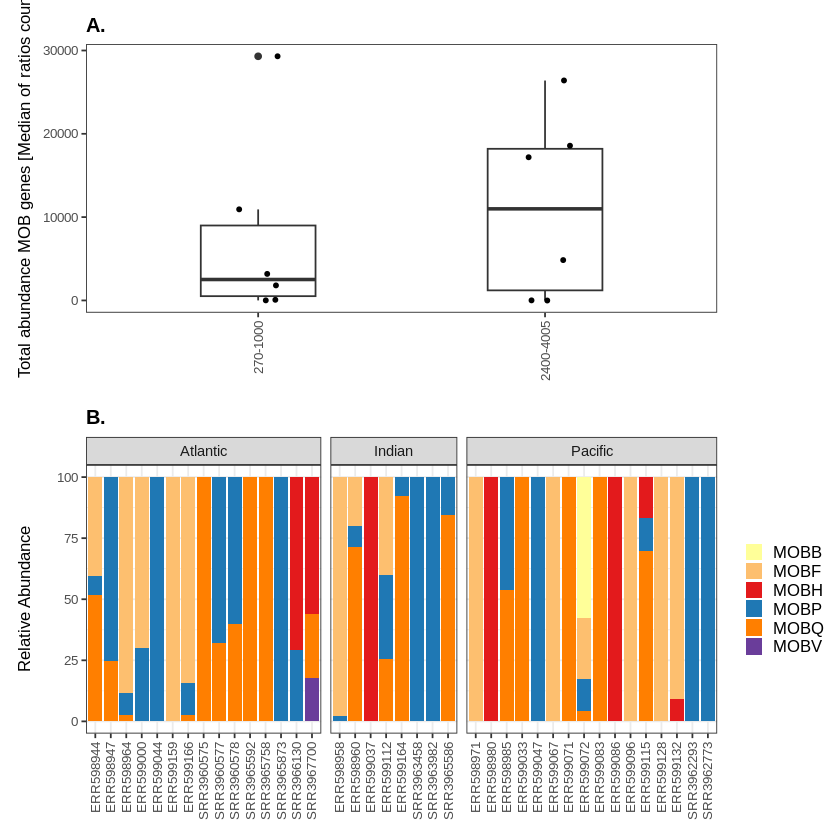

In [16]:
total_MOB/abundance_MOB
ggsave("MOB.png")

**Heatmap MOB genes**

Get differential expression results

The code extracts the differential expression results for MOB genes from the DESeq2 object dds_mob and stores them in mob_gene.

In [17]:
mob_gene <- results(dds_mob)

The code applies a variance-stabilizing transformation (vsd_gene) and a log-like normalization (ntd) to the DESeq2 dataset dds_mob for MOB genes to prepare the data for visualization.

In [18]:
vsd_gene <- varianceStabilizingTransformation(dds_mob, fitType='mean')

ntd <- normTransform(dds_mob)

The code selects theMOB genes by normalized count, prepares sample annotations, and generates a heatmap of variance-stabilized expression values grouped by ocean and depth using pheatmap.

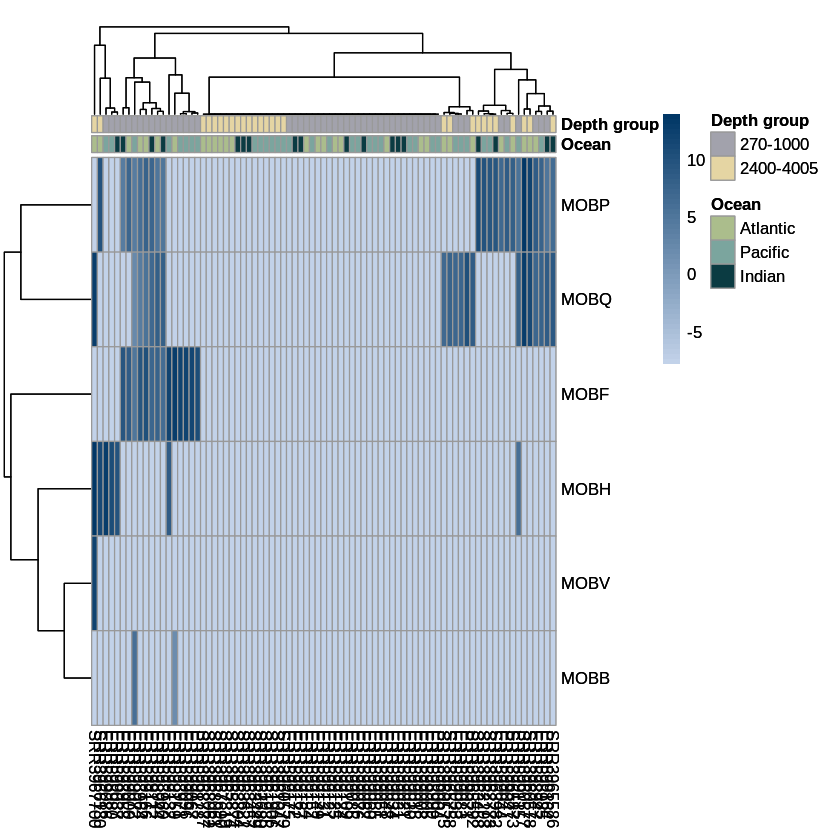

In [19]:
annotation <- c("Ocean", "depth.group")

select <- order(rowMeans(counts(dds_mob,normalized=TRUE)), decreasing=TRUE)[2:7]
df_gene <- as.data.frame(colData(dds_mob)[,c("Ocean","depth.group")])
colnames(df_gene) <- c("Ocean", "Depth group")

annot_colors=list(Ocean=c(`Atlantic`="#abbd8c", `Pacific`="#7ba59e", `Indian`="#0b3b42"),
                  `Depth group`=c(`270-1000`="#a2a2ac",`2400-4005`="#e5d5a3"))
heatmap <- pheatmap(assay(vsd_gene)[select, ], annotation_col=df_gene,
                    color=colorRampPalette(c("#c2d2e9","#013766"))(50),
                    main = "", annotation_colors = annot_colors)
heatmap

The code extracts the selected variance-stabilized gene expression data, transposes it so samples are rows, adds sample names, merges it with sample annotation data (df_gene), and stores the combined data in data.

In [20]:
heatmap_data <- as.data.frame(assay(vsd_gene)[select, ])
heatmap_data <- t(heatmap_data)
heatmap_data <- as.data.frame(heatmap_data)
samples <- rownames(df_gene)
df_gene$sample_name <- samples
heatmap_data$sample_name <- samples

data <- merge(heatmap_data, df_gene)

**Extract heatmap data to create plot in ggplot**

The code reshapes the combined dataset data from wide to long format using melt, then groups by gene (variable) and ocean to summarize statistics such as mean, sum, count, minimum, and maximum of expression values.

In [21]:
melted_data <- reshape2::melt(data, id.vars = c("sample_name", "Ocean", "Depth group"))
melted_data %>%  group_by(variable, `Ocean`) %>% summarise(mean = mean(value), sum = sum(value),
                                                           n = n(), min = min(value), max = max(value))

`summarise()` has grouped output by 'variable'. You can override using the
`.groups` argument.


variable,Ocean,mean,sum,n,min,max
<fct>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
MOBF,Atlantic,-4.819235,-139.75781,29,-7.853028,13.074240
MOBF,Indian,-5.259019,-94.66235,18,-7.853028,9.557410
MOBF,Pacific,-4.604323,-156.54699,34,-7.853028,12.166277
MOBP,Atlantic,-2.200230,-63.80668,29,-7.853028,14.003635
MOBP,Indian,-2.115087,-38.07157,18,-7.853028,11.139269
MOBP,Pacific,-5.137891,-174.68830,34,-7.853028,9.878740
MOBH,Atlantic,-6.454011,-187.16632,29,-7.853028,13.885817
MOBH,Indian,-6.868079,-123.62542,18,-7.853028,9.876053
MOBH,Pacific,-5.801694,-197.25759,34,-7.853028,12.890159


The code creates a heatmap using ggplot2 to visualize normalized gene expression values across depth groups and oceans, facetting by ocean.

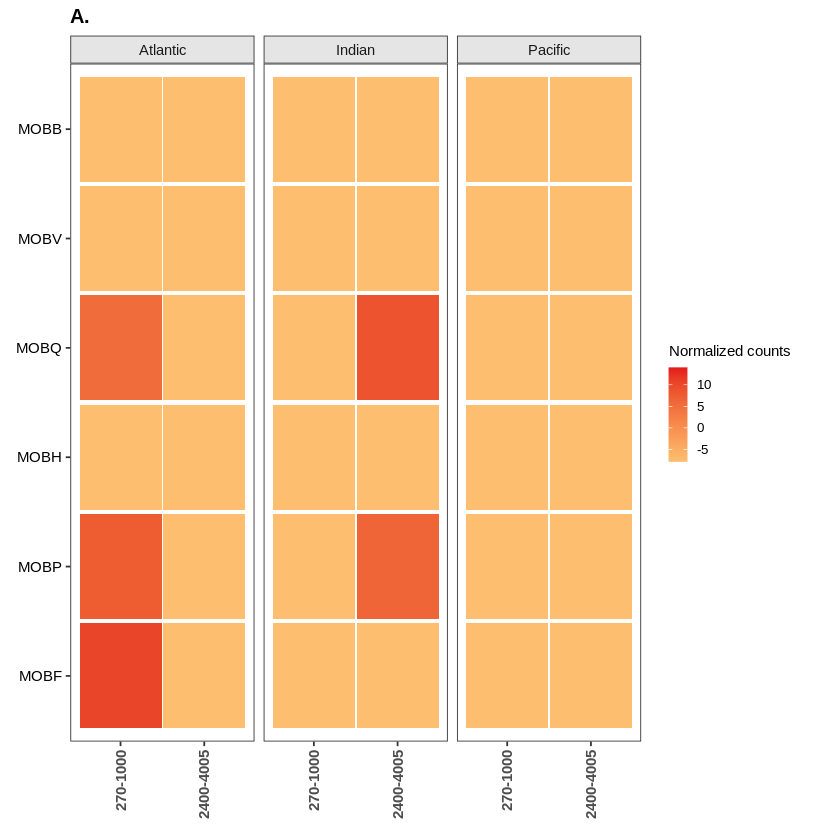

In [22]:
heatmap <- ggplot(melted_data, aes(x = factor(`Depth group`, levels=c("270-1000", "2400-4005")), y = variable, fill = value)) +
  geom_tile(color = "transparent",  width = 0.98, height = 0.96) +
  scale_fill_gradient(low = "#FDBF6F", high = "#E31A1C") +
  facet_grid(~ Ocean , scales = "free_x", space = "free_x") +
  labs(title = "") +
  theme_bw()+ggtitle("A.")+ylab("") + xlab("")+
  theme(plot.title = element_text(hjust = 0,size = 12, face="bold"),
        axis.text.x = element_text(size=9,angle = 90, vjust = 0.5, hjust=1, face="bold"),
        axis.text.y = element_text(size = 9, color = "black"),
        axis.title.y = element_text(size = 8),
        axis.title.x = element_blank(),
        legend.text = element_text(size = 8),
        legend.position = "right",
        legend.key.size = unit(0.4, "cm"),
        legend.title =  element_text(size = 9),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_rect(fill = "gray90"))+
  labs(fill = "Normalized counts")
print(heatmap)

**Phylo distribution**

The code merges the all_mob dataset with the metadata dataframe based on the Sample column, adding metadata information to the MOB data, and displays the first rows of the combined data.

In [23]:
data <- merge(all_mob, metadata, by.x = "Sample", by.y = "Sample")
head(data)

,Sample,sample_id,num_contigs,size,gc,md5,rep_type(s),rep_type_accession(s),relaxase_type(s),relaxase_type_accession(s),⋯,observed_host_range_ncbi_name,reported_host_range_lit_rank,reported_host_range_lit_name,associated_pmid(s),ENA_Run_Accession_ID,Ocean,Depth,depth.group,Longitude,Latitude
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,ERR598944,filtered_contigs.plasmid:AE825,1,121792,0.6521036,37578a18926329ea59db36934c7cbd28,-,-,-,-,⋯,Pacificitalea,-,-,-,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
2,ERR598944,filtered_contigs.plasmid:AF868,1,55461,0.6686500,e955a56015e20691c9a0e78d4a645d00,rep_cluster_252,001530__CP010865_00002,-,-,⋯,Rhodobacterales,-,-,-,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
3,ERR598944,filtered_contigs.plasmid:AF896,2,30014,0.4128407,4b32f83a83f616c919b8dae07c5ce5bf,rep_cluster_1207,000497__CP012534_00001,MOBQ,CP014946_00017,⋯,Psychrobacter,-,-,-,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
4,ERR598944,filtered_contigs.plasmid:AD061,20,121393,0.6074238,267358ef0890489f5abf935f0105fb75,-,-,MOBF,CP015441_00197,⋯,Aurantiacibacter,-,-,-,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
5,ERR598944,filtered_contigs.plasmid:novel_09d391bcf39fc71fc91e23802807743e,4,47012,0.6709351,09d391bcf39fc71fc91e23802807743e,rep_cluster_565,001965__CP012664_00035,-,-,⋯,Paracoccaceae,-,-,-,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
6,ERR598944,filtered_contigs.plasmid:AB933,2,14570,0.6254633,a46ab4d44c1beb0ce811c7ad0a434737,-,-,-,-,⋯,Sphingobium,-,-,-,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182


The code groups the all_mob data by class and relaxase_type(s), counts the occurrences of each class per relaxase type, reshapes the data to have classes as columns, replaces any missing values with zeros, and converts the result to a data frame mob_by_taxa.

In [24]:
mob_by_taxa <- all_mob  %>% group_by(class) %>% group_by(`relaxase_type(s)`) %>% dplyr::count(class) %>% pivot_wider(names_from = class, values_from = n)
mob_by_taxa <- as.data.frame(mob_by_taxa, col.names	=	TRUE)
mob_by_taxa[is.na(mob_by_taxa)] <- 0
mob_by_taxa

relaxase_type(s),Actinomycetota,Alphaproteobacteria,Bacilli,Gammaproteobacteria,Flavobacteriia
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-,2,135,1,39,0
MOBB,0,0,0,0,2
MOBF,1,16,0,0,0
MOBH,0,0,0,7,0
MOBP,0,41,0,1,0
MOBQ,0,25,0,7,0
MOBV,0,0,0,1,0


The code sets the row names of mob_by_taxa using its first column, removes that first column to create mob_by_taxa_traits, deletes the 12th row, then displays the resulting data frame and calculates the sum of each column.

In [25]:
row.names(mob_by_taxa) = mob_by_taxa[, 1]
mob_by_taxa_traits <- as.data.frame((mob_by_taxa[,-1]))

mob_by_taxa_traits <- mob_by_taxa_traits[-12, ]
mob_by_taxa_traits
colSums(mob_by_taxa_traits)

,Actinomycetota,Alphaproteobacteria,Bacilli,Gammaproteobacteria,Flavobacteriia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-,2,135,1,39,0
MOBB,0,0,0,0,2
MOBF,1,16,0,0,0
MOBH,0,0,0,7,0
MOBP,0,41,0,1,0
MOBQ,0,25,0,7,0
MOBV,0,0,0,1,0


Actinomycetota Alphaproteobacteria             Bacilli Gammaproteobacteria 
                  3                 217                   1                  55 
     Flavobacteriia 
                  2

The code removes the first row and the third column from mob_by_taxa_traits and then displays the updated data frame.

In [26]:
mob_by_taxa_traits <- mob_by_taxa_traits[-1,-3]
mob_by_taxa_traits

,Actinomycetota,Alphaproteobacteria,Gammaproteobacteria,Flavobacteriia
,<dbl>,<dbl>,<dbl>,<dbl>
MOBB,0,0,0,2
MOBF,1,16,0,0
MOBH,0,0,7,0
MOBP,0,41,1,0
MOBQ,0,25,7,0
MOBV,0,0,1,0


The code calculates row sums of mob_by_taxa_traits, transposes and subsets the data, normalizes the rows to relative abundances using decostand, verifies the normalization, converts it to a dataframe, adds row names as a column, and reshapes it into a long format for MOB abundance analysis.

In [27]:
apply(mob_by_taxa_traits, 1, sum)
mob_by_taxa_traits.t <- t(mob_by_taxa_traits)
rowSums(mob_by_taxa_traits.t)
mob_by_taxa_traits.t <- mob_by_taxa_traits.t[-(8:13), ]
rowSums(mob_by_taxa_traits.t)
mob_by_taxa_traits.1 <-
  decostand(mob_by_taxa_traits.t, method = "total")
apply(mob_by_taxa_traits.1, 1, sum)
mob_by_taxa_traits.1 <- as.data.frame(mob_by_taxa_traits.1)
mob_by_taxa_traits.1$row_names <- row.names(mob_by_taxa_traits.1)
mob_by_taxa_traits.2 <-  mob_by_taxa_traits.1 %>%
  pivot_longer(!row_names, names_to = "mob_name", values_to = "MOB_abundance")

MOBB MOBF MOBH MOBP MOBQ MOBV 
   2   17    7   42   32    1

Actinomycetota Alphaproteobacteria Gammaproteobacteria      Flavobacteriia 
                  1                  82                  16                   2

Actinomycetota Alphaproteobacteria Gammaproteobacteria      Flavobacteriia 
                  1                  82                  16                   2

Actinomycetota Alphaproteobacteria Gammaproteobacteria      Flavobacteriia 
                  1                   1                   1                   1

The code generates a stacked bar plot showing the relative abundance of different MOB families (mob_name) across classes.

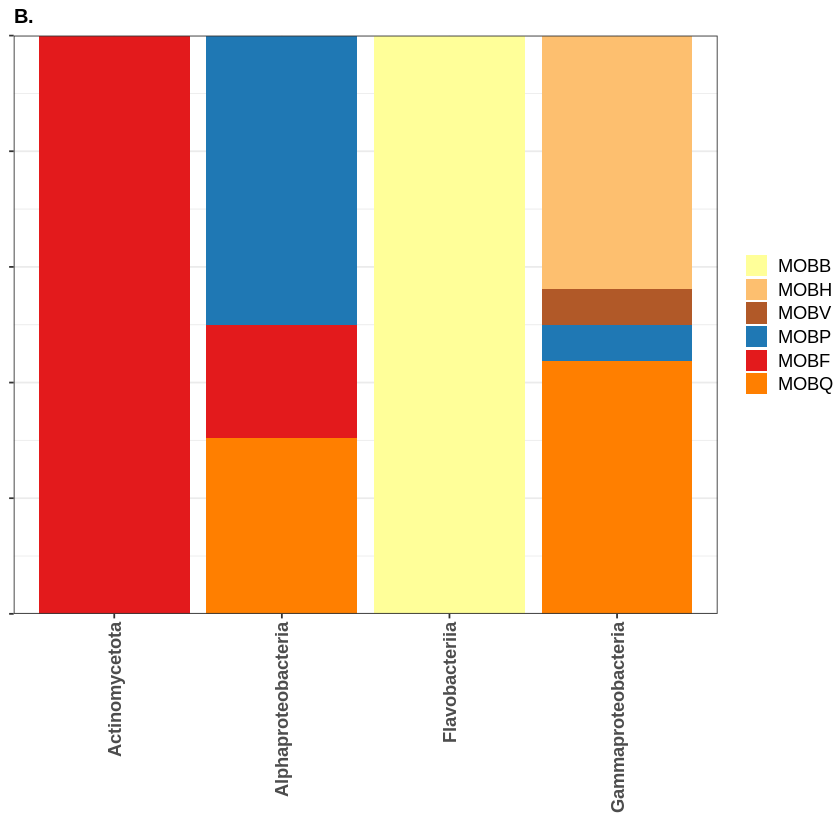

In [28]:
c10c <- c("#FFFF99", "#FDBF6F","#B15928","#1F78B4", "#E31A1C","#FF7F00", "#A6CEE3")

figure_2B <-
  ggplot(mob_by_taxa_traits.2,
         aes(
           x = row_names,
           y = MOB_abundance,
           fill = fct_reorder(mob_name, MOB_abundance)
         )) +
  geom_bar(stat = "identity", position = "fill") +
  scale_fill_manual(values = c10c) +
  scale_y_continuous(breaks = seq(0, 1, by = 0.2), expand = c(0, 0)) +
  #theme_classic() +  ggtitle("B.") +
  theme_bw()  +  ggtitle("B.") +
  #theme(legend.position = "right") +
  labs(fill = "mob_name") +
  xlab(label = "Class") +
  ylab(label = "") +
  guides(fill = guide_legend(title = "MOB Families")) +
  theme(plot.title = element_text(hjust = 0,size = 12, face="bold"),
        axis.text.x = element_text(size=11,angle = 90,vjust = 0.5, hjust=1, face = "bold"),
        axis.text.y = element_blank(),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        legend.text = element_text(size = 11),
        legend.position = "right",
        legend.key.size = unit(0.5, "cm"),
        legend.title = element_blank())

plot(figure_2B)

The code combines plots side-by-side and saves the combined figure as "MOB_figure.png"

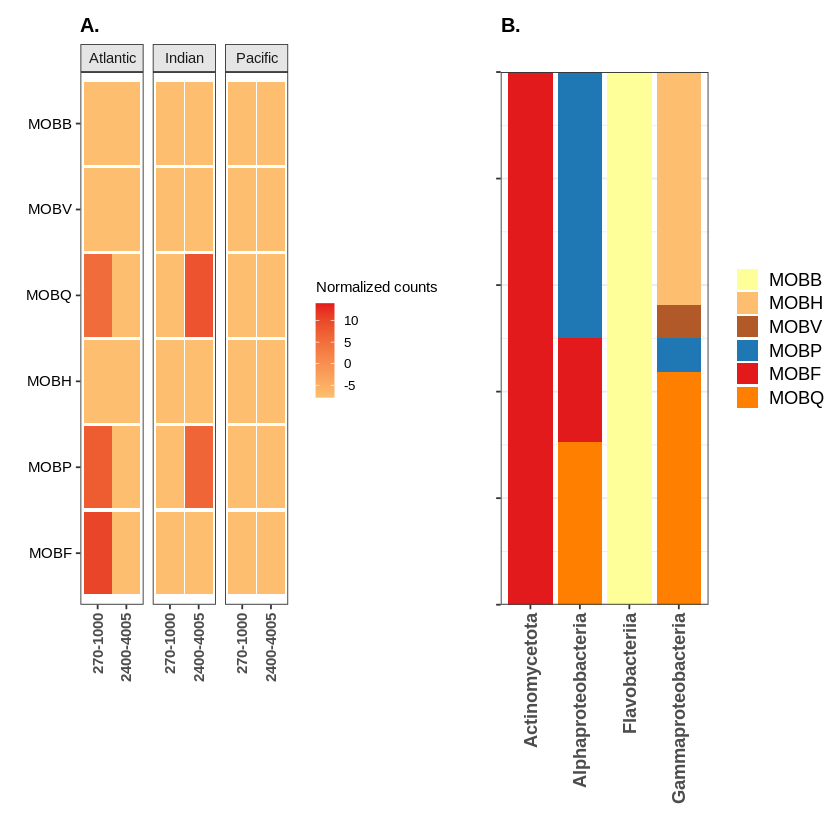

In [29]:
library(patchwork)
heatmap+figure_2B
ggsave("MOB_figure.png", width = 8.5, height = 7)